In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
# from sklearn.metrics  import 

In [42]:
iris=sns.load_dataset('iris')

In [43]:
iris.isna().head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [44]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [45]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [47]:
# sns.pairplot(iris)

In [48]:
# sns.pairplot(iris,hue='species')

In [49]:
sns.stripplot(x='species',y='sepal_length',data= iris)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

In [50]:
sns.stripplot(x='species',y='petal_length',data= iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

In [51]:
sns.stripplot(x='species',y='petal_length',data= iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

In [52]:
sns.stripplot(x='species',y='petal_width',data= iris)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

In [53]:
X=iris.iloc[:,[2,3]].values
Y=iris.iloc[:,-1].values

In [54]:
print(X.shape,Y.shape)

(150, 2) (150,)


In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               Y ,
                                               test_size= 0.2,
                                              random_state=123)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 2) (30, 2) (120,) (30,)


# KNNeighbours algorithm

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# How to choose K?
Practioner's rule is sqrt(no. of obvervations)

In [57]:
120**0.5

10.954451150103322

In [58]:
# create a instance of the class
model= KNeighborsClassifier(n_neighbors=11)
model.fit(X_test,Y_test)
model.score(X_test,Y_test)

0.9666666666666667

In [59]:
accuracy_score=[]
for k in range(2,21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_test,Y_test)
    accuracy_score.append(round(model.score(X_test,Y_test),2))

In [60]:
accuracy_score

[0.97,
 1.0,
 0.97,
 0.97,
 0.97,
 0.97,
 1.0,
 0.97,
 0.97,
 0.97,
 0.97,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8]

In [61]:
plt.plot(range(2,21),accuracy_score,
         color='b', ls='--',mfc='r',marker='*',ms='12')
plt.title('acccuracy score')
plt.xticks(range(2,21))
plt.xlabel('k values')
plt.ylabel("accuracy score")
plt.show()

# cross validaation

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
model.fit(X,Y)
scores=cross_val_score(model,X,Y)
print(scores.mean())

0.96


<IPython.core.display.Javascript object>


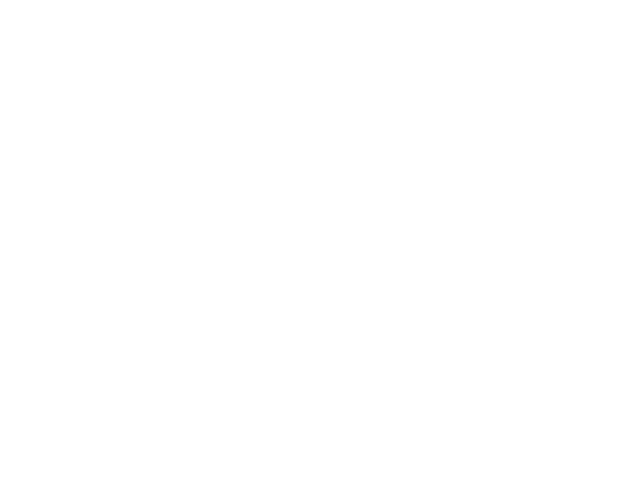

In [64]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(model,X,Y)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(Y_test,model.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [67]:
%matplotlib notebook
from mpl_toolkits import mplot3d

In [81]:
X,Y=np.meshgrid(np.arange(X_test[:,0].min()-1,X_test[:,0].max()+1,0.05),
                np.arange(X_test[:,1].min()-1,X_test[:,1].max()+1,0.05))

In [69]:
print(X.shape, Y.shape)

(84, 152) (84, 152)


In [70]:
Y.shape

(84, 152)

In [71]:
Y_cont=model.predict(np.c_[X.ravel(),Y.ravel()])

In [72]:
Z = Y_cont.reshape(X.shape)

In [73]:
Y_cont= np.where(Y_cont=='setosa',0,Y_cont)
Y_cont= np.where(Y_cont=='versicolor',1,Y_cont)
Y_cont= np.where(Y_cont=='virginica',2,Y_cont)



In [74]:
Y_cont

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

In [75]:
Z= Y_cont.reshape(X.shape)

In [76]:
Z.shape

(84, 152)

<IPython.core.display.Javascript object>


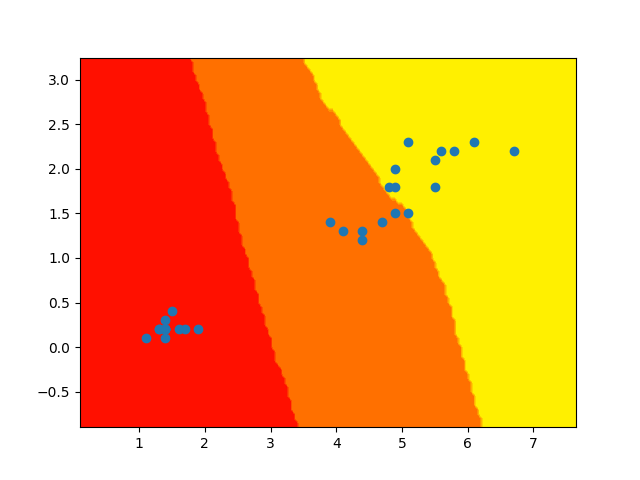

In [77]:
plt.contourf(X,Y,Z, cmap=plt.cm.autumn)
plt.scatter(X_test[:,0],X_test[:,1])


# parametric and non parapetric model

# fine tuning paramer

In [78]:
w=['uniform','distance']
acccuracy_score=[]
for i in w:
    model= KNeighborsClassifier(n_neighbors=11,weights=i)
    model.fit(X_train,Y_train)
    accuracy_score.append(round(model.score(X_test,Y_test),2))


In [79]:
accuracy_score

[0.97,
 1.0,
 0.97,
 0.97,
 0.97,
 0.97,
 1.0,
 0.97,
 0.97,
 0.97,
 0.97,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.97,
 0.93]

# use cross validation  score and do hyper parameter tuning

In [80]:
X=iris.iloc[:,[2,3]].values
Y=iris.iloc[:,-1].values
w=['uniform','distance']
acccuracy_score=[]
for i in w:
    model= KNeighborsClassifier(n_neighbors=11,weights=i)
    model.fit(X,Y)
    scores=cross_val_score(model,X,Y)
    accuracy_score.append(scores)
print(acccuracy_score)
   

[]
